In [5]:
import pandas as pd

# Load the 2D dataset
data_2d = pd.read_csv('D:/Projects/Module 3/m3_h1/M3_H6/data/data_2d.csv')  # Replace with the path to your data_2d.csv file
mnist = pd.read_csv('D:/Projects/Module 3/m3_h1/M3_H6/data/mnist.csv')  # Replace with the path to your mnist.csv file


# Let's take a peek at the first few rows to ensure it's loaded correctly
print(data_2d.head())
print(mnist.shape)

   0.000000000000000000e+00  -7.687164597386728637e-01  \
0                       0.0                   2.687848   
1                       0.0                  -0.201379   
2                       0.0                   0.608496   
3                       0.0                  -0.082282   
4                       0.0                   2.083069   

   4.608603078297135447e-01  
0                  2.366961  
1                  0.470430  
2                  1.225400  
3                  1.137218  
4                  2.694482  
(499, 785)


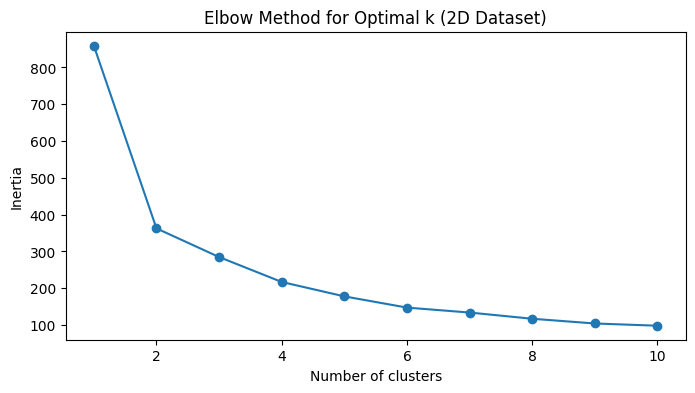

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Apply K-means clustering to the 2D dataset
# First, let's find the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):  # Test 1 to 10 clusters
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(data_2d)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k (2D Dataset)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

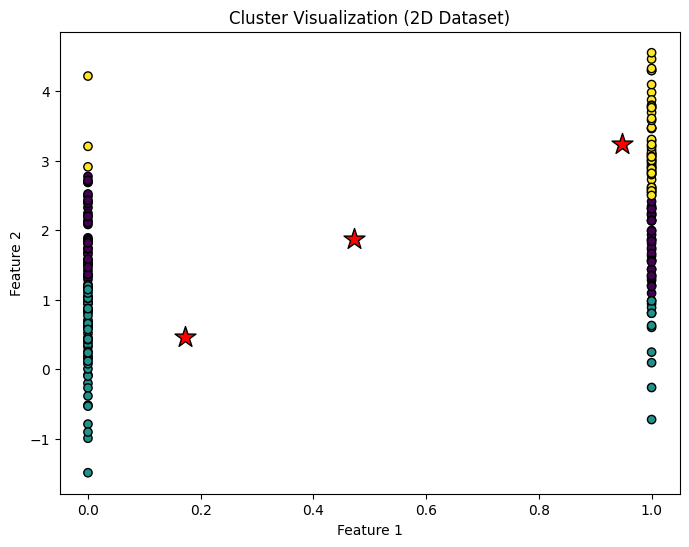

In [7]:
# Assuming the elbow is at k=3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
data_2d['cluster'] = kmeans.fit_predict(data_2d.iloc[:, :2])  # Make sure to cluster only the data without labels if present

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(data_2d.iloc[:, 0], data_2d.iloc[:, 1], c=data_2d['cluster'], cmap='viridis', marker='o', edgecolor='k')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=250, marker='*', edgecolor='k')
plt.title('Cluster Visualization (2D Dataset)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

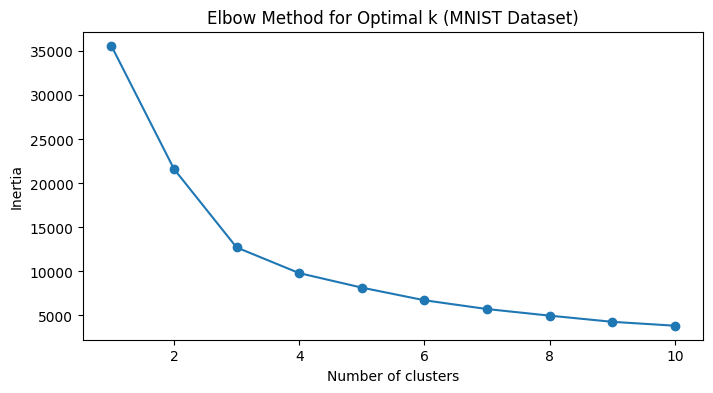

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming the last column is the label, we drop it for unsupervised learning
mnist_features = mnist.drop(mnist.columns[-1], axis=1)

# Standardize the features before PCA
scaler = StandardScaler()
mnist_scaled = scaler.fit_transform(mnist_features)

# Apply PCA to reduce the dimensionality to 2D
pca = PCA(n_components=2)
mnist_2d = pca.fit_transform(mnist_scaled)

# Apply K-means clustering (elbow method)
inertia = []
for k in range(1, 11):  # Test 1 to 10 clusters
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(mnist_2d)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k (MNIST Dataset)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


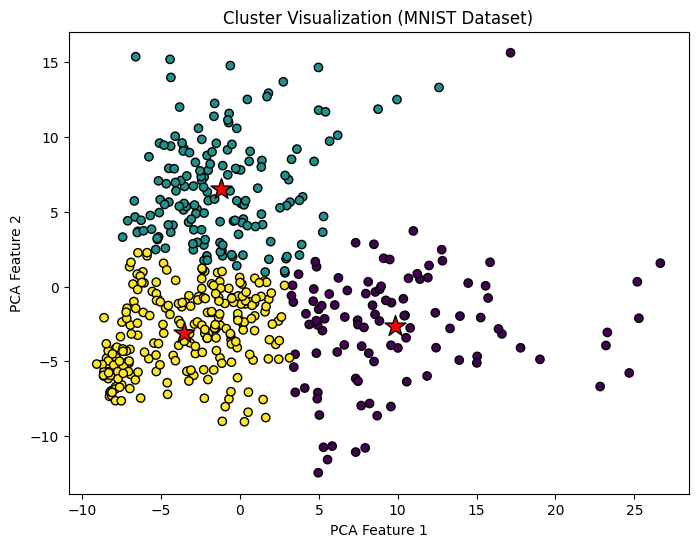

In [11]:
# Assuming the elbow is at k=3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
mnist_2d_labels = kmeans.fit_predict(mnist_2d)

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(mnist_2d[:, 0], mnist_2d[:, 1], c=mnist_2d_labels, cmap='viridis', marker='o', edgecolor='k')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=250, marker='*', edgecolor='k')
plt.title('Cluster Visualization (MNIST Dataset)')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.show()
